In [1]:
from prepare_ic_galaxy import *
from spiral import *

In [27]:
# init galaxy parameters
CORE_RAD     = 50      # radius of core
GAL_RAD      = 1000     # radius of visible spiral arms
DIST_RAD     = 5000     # end radius of galaxy
INNER_E      = 0.4    # inner eccentricity
OUTER_E      = 0.9    # outer eccentricity
ANG_OFF      = 4      # 'coiledness' of spiral arms
N_ELLIPSES   = 1000   # number of ellipses to produce

# make ellipses
ellipses = make_ellipses(core_radius=CORE_RAD, galaxy_radius=GAL_RAD, \
                            distant_radius=DIST_RAD, inner_eccentricity=INNER_E, \
                            outer_eccentricity=OUTER_E, angular_offset=ANG_OFF, \
                            n_ellipses=N_ELLIPSES)

# make galaxy from ellipses
gxy = make_galaxy(ellipses)

In [54]:
r_extract_star = np.random.exponential(1000, 1000)
z_extract_star = np.random.normal(loc=0, scale=5, size=1000)
theta_star = np.random.uniform(0, 2*np.pi, 1000)

# x = r_extract_star * np.cos(theta_star)
# y = r_extract_star * np.sin(theta_star)

r_eff_dm_pc = 10000
r_eff_star_pc = 1000
M_dm_tot_msun = 1e14
M_star_tot_msun = 1e13
n_sersic = 1
concentration = 1

v_r_star, v_theta_star, v_phi_star = initial_velocity(1000, r_extract_star, r_vir=r_eff_dm_pc,
                                                        reff=r_eff_star_pc, M_tot_dm=M_dm_tot_msun,
                                                        M_tot_star=M_star_tot_msun, n_sersic=n_sersic,
                                                        concentration=concentration,
                                                        velocity_dispersion=5)

v_modulus = np.sqrt(v_r_star ** 2 + v_theta_star ** 2 + v_phi_star ** 2)
phi_star_particles = np.arccos(z_extract_star / np.sqrt(r_extract_star ** 2 + z_extract_star ** 2))

# map sampled radii to galaxy
x, y, vx, vy = map_r_to_galaxy(r_extract_star, gxy)

vn = np.sqrt(vx**2 + vy**2)

e_scale = -1*v_theta_star / vn

vx *= e_scale
vy *= e_scale

theta_star_new = np.arctan2(y, x)

vex = -1* v_r_star * np.cos(theta_star_new)
vey = v_r_star * np.sin(theta_star_new)

vx += vex
vy += vey

vx_star, vy_star, vz_star = convert_velocity_spherical_to_cartesian(v_r=v_r_star, theta_v=v_theta_star, phi_v=v_phi_star, theta_loc=theta_star_new)

[3788.62255903 3991.79772062 1191.92847393 3430.28779212 3970.6304517
 3772.77721175 3707.30625131 2087.27002642 2458.88860466 3838.52849763
 1854.240231   2635.08819013 1618.19568551 4054.03192321 3833.05664417
 3590.30381776 2430.05923519 3886.27399045 3842.26232364 3082.3604716
 1667.00480825 3715.5064962  3895.0260427  1369.27259632   30.71887493
 3891.79987943 2728.31619186  857.00984394 2381.36209262 3329.70212144
 3067.75572054 2003.02921957 3252.74845083 3176.26042693 3870.48964726
 1172.72765008 3747.31980639 4047.7991647  3281.63658504 3893.87209542
 3713.39988583  503.34960823 3422.46487385 4050.85985578 1508.50769454
 4044.54969584 3431.83788372 1105.98946792 3460.98914251 3436.95415205
  104.16659022 2159.47144337 4053.13738118 2692.19850819 3470.78525811
 1872.19643417 2540.92943473 3823.89255279 2701.14770402 3220.28935654
 3995.40315243 3764.53227008 1430.407046   3553.76610006 3616.71048434
 1480.1110785   524.3046791  1973.65227945 4004.82399705 2495.70132194
 3972.39

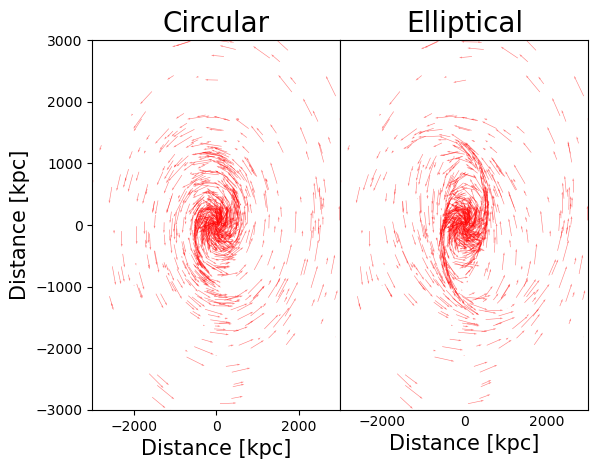

In [55]:
fig, axs = plt.subplots(1,2, sharey=True)
# fig.gca().set_aspect('equal')
fig.subplots_adjust(wspace=0.0, hspace=0.5)

axs[0].quiver(x, y, vx_star/100, vy_star/100, scale=np.ones(len(x))/5, angles='xy', units='xy', color='red', alpha=0.5)
axs[0].set_xlim(-3000, 3000)
axs[0].set_ylim(-3000, 3000)
# axs[0].set_xlim(-100, 100)
# axs[0].set_ylim(-100, 100)
axs[0].set_title("Circular", fontsize=20)
axs[0].set_ylabel("Distance [kpc]", fontsize=15)
axs[0].set_xlabel("Distance [kpc]", fontsize=15)

axs[1].quiver(x, y, vx/100, vy/100, scale=np.ones(len(x))/5, angles='xy', units='xy', color='red', alpha=0.5)
axs[1].set_xlim(-3000, 3000)
axs[1].set_ylim(-3000, 3000)
axs[1].tick_params(axis='both', which='both', length=0, labelbottom=True, labelleft=False)
# axs[1].set_xlim(-100, 100)
# axs[1].set_ylim(-100, 100)
axs[1].set_title("Elliptical", fontsize=20)
# axs[1].set_ylabel("Distance [kpc]", fontsize=15)
axs[1].set_xlabel("Distance [kpc]", fontsize=15)

plt.show()

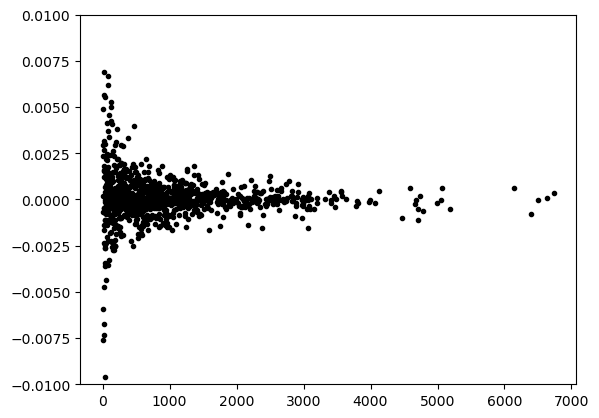

In [61]:
vr_e = np.sqrt(vx**2 + vy**2)
# plt.plot(r_extract_star, vr_e, '.m')
# plt.plot(r_extract_star, v_theta_star, '.g', alpha=0.5)
plt.plot(r_extract_star, vr_e/v_theta_star - 1.0, '.k')
plt.ylim(-0.01, 0.01)
plt.show()